In [1]:
!pip install pyarrow

In [3]:
# !pip install sacrebleu
# !pip install evaluate


# Import necessary library 

In [4]:
import shutil
import os
from datasets import Dataset
from transformers import AutoTokenizer
from datasets import Dataset
import numpy as np 
import pandas as pd
from transformers import AutoModelForSeq2SeqLM, TrainingArguments, Trainer
from transformers import AutoModelForSeq2SeqLM, TrainingArguments, Trainer
import evaluate
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.parallel._functions")
import matplotlib.pyplot as plt

# Load the arrow data set 

In [5]:
# Importing the dataset to working directory
input_file_path = "/kaggle/input/train-dataset/data-00000-of-00001.arrow" 
writable_file_path = "/kaggle/working/train_data.arrow"

dataset = Dataset.from_file(input_file_path)
shutil.copy(input_file_path, writable_file_path)
val_data_load_path="/kaggle/input/val-dataset/data-00000-of-00001.arrow"
val_data_write_path="/kaggle/working/val_data.arrow"
shutil.copy(val_data_load_path, val_data_write_path)

# Loading dataset
dataset = Dataset.from_file(writable_file_path)
val_data=Dataset.from_file(val_data_write_path)

# Knowing about the data set

In [6]:
NoofDatasetTrainable = 0
for i in dataset:
    NoofDatasetTrainable +=1
print(f"Trainable dataset length will be {NoofDatasetTrainable}")



NoofDatasetvalidation = 0
for i in val_data:
    NoofDatasetvalidation +=1
print(f"validation dataset length will be {NoofDatasetvalidation}")


Trainable dataset length will be 4008
validation dataset length will be 576


In [7]:
input_lengths = [len(sample["input_text"].split()) for sample in dataset]
target_lengths = [len(sample["target_text"].split()) for sample in dataset]

In [8]:
for i in range(5):
    print(dataset[i])

{'input_text': 'T: Hi you how to do it today? [SEP] P: Great. How are you?', 'target_text': "I'm doing well. Thanks for asking."}
{'input_text': "T: Hi you how to do it today? [SEP] P: Great. How are you? [SEP] T: I'm doing well. Thanks for asking.", 'target_text': "So you're doing great."}
{'input_text': "T: Hi you how to do it today? [SEP] P: Great. How are you? [SEP] T: I'm doing well. Thanks for asking. [SEP] T: So you're doing great. [SEP] P: I'm doing awesome.", 'target_text': "I know your brother brought you in today and he had expressed some concerns about your mood. Do you know what that's about?"}
{'input_text': "T: Hi you how to do it today? [SEP] P: Great. How are you? [SEP] T: I'm doing well. Thanks for asking. [SEP] T: So you're doing great. [SEP] P: I'm doing awesome. [SEP] T: I know your brother brought you in today and he had expressed some concerns about your mood. Do you know what that's about? [SEP] P: I, I think he's worrying for no reason. Because I, you know, I f

# traing the model 

In [9]:
# Model and Tokenizer
MODEL_NAME = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def preprocess_function(examples):
    inputs = examples["input_text"]
    targets = examples["target_text"]
    
    model_inputs = tokenizer(inputs, max_length=512, padding="max_length", truncation=True)
    labels = tokenizer(targets, max_length=128, padding="max_length", truncation=True)

    model_inputs["labels"] = [
        [(l if l != tokenizer.pad_token_id else -100) for l in label] for label in labels["input_ids"]
    ]
    
    return model_inputs
# Tokenizing the dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)
tokenized_val_data=val_data.map(preprocess_function,batched=True)


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/4008 [00:00<?, ? examples/s]

Map:   0%|          | 0/576 [00:00<?, ? examples/s]

In [10]:
print(len(tokenized_val_data))

576


In [11]:
print(tokenized_dataset[0])

{'input_text': 'T: Hi you how to do it today? [SEP] P: Great. How are you?', 'target_text': "I'm doing well. Thanks for asking.", 'input_ids': [0, 565, 35, 12289, 47, 141, 7, 109, 24, 452, 116, 646, 3388, 510, 742, 221, 35, 2860, 4, 1336, 32, 47, 116, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [12]:
import torch
import evaluate
import gc
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)
metric = evaluate.load("sacrebleu")

# Function to compute BLEU score
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    decoded_preds = [tokenizer.decode(pred, skip_special_tokens=True) for pred in predictions]
    decoded_labels = [[tokenizer.decode(label, skip_special_tokens=True)] for label in labels]
    result = metric.compute(predictions=decoded_preds, references=decoded_labels) 
    bleu_score = result["score"]
    del predictions, labels
    gc.collect()
    torch.cuda.empty_cache()

    return {"BLEU Score": bleu_score}


#fine tune
training_args = TrainingArguments(
    output_dir="./bart_finetuned",
    eval_strategy="epoch",  
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    report_to="none",
)


# Training model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset, 
    eval_dataset=tokenized_val_data, 
)

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [14]:
# train_result = trainer.train()

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss
1,3.402600,3.066933
2,3.219200,3.037137
3,3.176400,3.034395


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


In [15]:
model.save_pretrained("./bart_finetuned_model")
tokenizer.save_pretrained("./bart_finetuned_model")

('./bart_finetuned_model/tokenizer_config.json',
 './bart_finetuned_model/special_tokens_map.json',
 './bart_finetuned_model/vocab.json',
 './bart_finetuned_model/merges.txt',
 './bart_finetuned_model/added_tokens.json',
 './bart_finetuned_model/tokenizer.json')

# plot the graph of val and train loss 

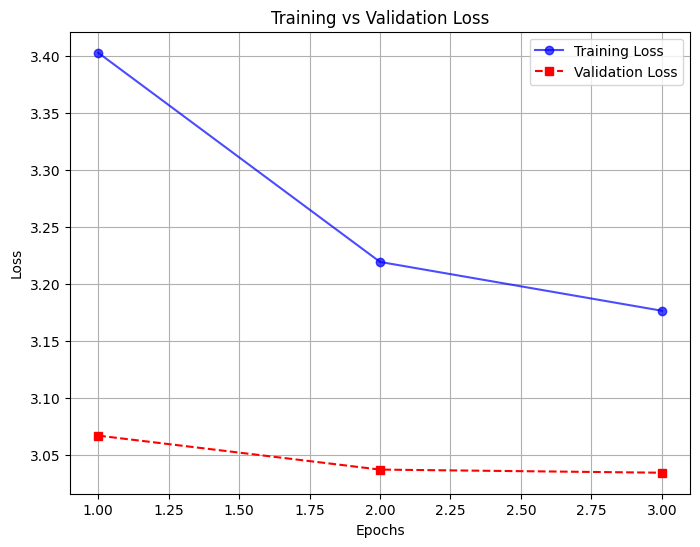

In [11]:
# plot the graph 
epochs = [1, 2, 3] 
train_loss_list = [3.402600, 3.219200, 3.176400]  
val_loss_list = [3.066933, 3.037137, 3.034395]


plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss_list, label="Training Loss", marker='o', linestyle='-', alpha=0.7, color='blue')
plt.plot(epochs, val_loss_list, label="Validation Loss", marker='s', linestyle='--', color='red')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [22]:
test_data_load_path="/kaggle/input/testdataset/data-00000-of-00001.arrow"
test_data_write_path="/kaggle/working/test_data.arrow"
shutil.copy(test_data_load_path, test_data_write_path)
test_data=Dataset.from_file(test_data_write_path)
input_texts = [example["input_text"] for example in test_data]
target_texts = [example["target_text"] for example in test_data]

print(input_texts[:5]) 
print(target_texts[:5]) 


tokenized_test_data=val_data.map(preprocess_function,batched=True)

["T: So, alright, let's take a step back and talk about competency. What education Did you need for the job you have now? [SEP] P: I have my bachelor's degree. And we got a little bit of training. You know every so often we get some training at work and stuff like that.", "T: So, alright, let's take a step back and talk about competency. What education Did you need for the job you have now? [SEP] P: I have my bachelor's degree. And we got a little bit of training. You know every so often we get some training at work and stuff like that. [SEP] T: Are you evaluated at work by anybody to see if you're in a job you should be? [SEP] P: Yeah, I have a supervisor so they check up on stuff and also like if I feel like I have questions and stuff like that, I can go to them as well.", "T: So, alright, let's take a step back and talk about competency. What education Did you need for the job you have now? [SEP] P: I have my bachelor's degree. And we got a little bit of training. You know every so 

Map:   0%|          | 0/576 [00:00<?, ? examples/s]

# Generate on given test dataset 

In [24]:

model_checkpoint = "/kaggle/working/bart_finetuned_model"
# use tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

input_text = "T: Hi,tell me what has been troubling you for so long mentally? P: nothing as such,but i feel stressed about certain things!"

inputs = tokenizer(input_text, return_tensors="pt", max_length=512, padding="max_length", truncation=True)
inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the same device as the model

with torch.no_grad(): 
    outputs = model.generate(
        inputs["input_ids"],
        max_length=512, 
        num_beams=5,  
        early_stopping=True  
    )

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Generated Target Text:", generated_text)



Generated Target Text: you feel stressed about certain things?
